In [41]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.datasets import mnist
import numpy as np

In [42]:
(x_train, _), (x_test, _) = mnist.load_data()


In [43]:
X_train=x_train.astype("float32")/255
X_test=x_test.astype("float32")/255

In [44]:
X_train=X_train.reshape((len(X_train),28,28,1))
X_test=X_test.reshape((len(X_test),28,28,1))

In [58]:
noise_factor = 0.3
X_train_noisy=X_train+noise_factor*np.random.normal(loc=0.0,scale=1.0,size=X_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(X_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [59]:
autoencoder = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D((2,2), padding='same'),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), padding='same'),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(32, (3,3), activation='relu', padding='same'),
    UpSampling2D((2,2)),
    Conv2D(1, (3,3), activation='sigmoid', padding='same')
])

In [47]:
# Encoder

autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D((2, 2), padding='same'))

In [48]:
# Decoder
autoencoder.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D((2, 2)))
autoencoder.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

In [60]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: -465.4981 - val_loss: -532.4404
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: -524.3351 - val_loss: -533.1509
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: -526.0581 - val_loss: -533.2153
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: -525.3175 - val_loss: -533.2194
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: -525.5204 - val_loss: -533.5301
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: -525.5565 - val_loss: -533.6179
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: -525.2686 - val_loss: -533.5247
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: -525.6901 - val_loss: -533.3989
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: -526.9582 - val_loss: -533.5668
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: -525.9507 - val_loss: -533.5076


In [61]:
print("Min/Max of x_train:", x_train.min(), x_train.max())
print("Min/Max of x_train_noisy:", x_train_noisy.min(), x_train_noisy.max())


Min/Max of x_train: 0 255
Min/Max of x_train_noisy: 0.0 1.0


In [62]:
decoded_imgs = autoencoder.predict(x_test_noisy)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [63]:
import matplotlib.pyplot as plt

n = 10  # Number of images to show
plt.figure(figsize=(50, 16))

<Figure size 5000x1600 with 0 Axes>

<Figure size 5000x1600 with 0 Axes>

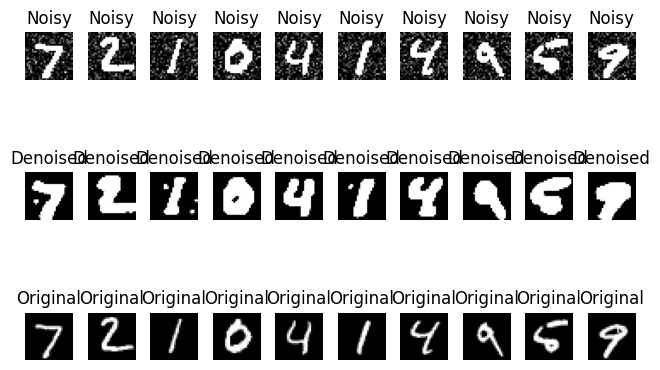

In [64]:
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
plt.tight_layout()
plt.show()
